In [2]:
# Preliminary setup
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [48]:
# Import dataset from df.pickle
#df = pd.read_pickle("somedata_clean.pickle")
df = pd.read_pickle("alldata_clean.pickle")

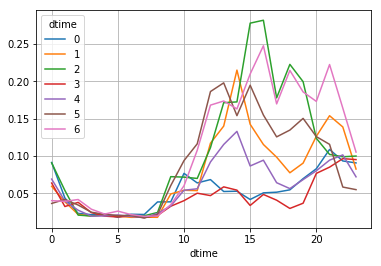

In [49]:
# Plot a trace of hourly average power for each DOW
ds = df.sub2
g = ds.groupby([ds.index.hour,ds.index.dayofweek]) # df.index.dayofweek,
ax = g.mean().unstack().plot(grid=True)

In [62]:
import scipy.signal
(pf,pPxx) = scipy.signal.periodogram(df.sub2,fs=1/60)


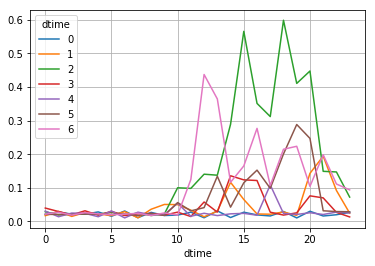

In [90]:
dw = df[df.index.month.isin([9,10,11]) & df.index.year.isin([2009]) ]
ds = dw.sub2
g = ds.groupby([ds.index.hour,ds.index.dayofweek]) # df.index.dayofweek,
ax = g.mean().unstack().plot(grid=True)
(wf,wPxx) = scipy.signal.periodogram(dw.sub2,fs=1/60)

Text(0.5,1,'Winter 2009 periodogram')

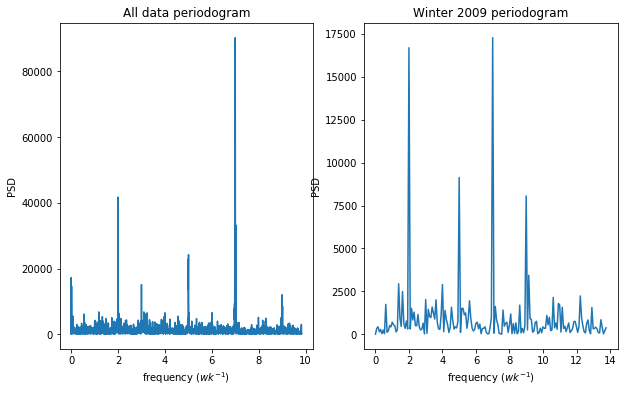

In [94]:
fig, axes = plt.subplots(1, 2,figsize=(10,6)
                         , sharex=False, sharey=False)  

ax = axes[0]
fbins = 2000
freqmult = 3600*24*7
ax.plot(pf[0:fbins]*freqmult,pPxx[0:fbins])
ax.set_xlabel('frequency ($wk^{-1}$)')
ax.set_ylabel('PSD')
ax.set_title('All data periodogram')


ax = axes[1]
wbins=180
ax = plt.gca()
ax.plot(wf[0:wbins]*freqmult,wPxx[0:wbins])
ax.set_xlabel('frequency ($wk^{-1}$)')
ax.set_ylabel('PSD')
ax.set_title('Winter 2009 periodogram')


## Interpretation
The large spike at daily frequency suggests that laundry tends to happen at around the same time every day.    The spikes at 2x and 5x per week suggests that at least some of the data demonstrates a biweekly tendency, and that some set of 5 days is generally more popular than the other two.

The shorter window on winter of 2009 shows a much more exaggerated spike at 2x per week, adding weight to the hypothesis that Wednesday and Sunday were likely to be laundry day during that period.  A smaller peak at 5x per week suggests that there are two unpopular days.  The smallest distinct peak at 9x per week suggests a patterened time of day variation.